# **Inteligencia artificial**
# Entrenamiento de una Red Convolusional

**Modelo:** 3 **Grupo:** 002 **Hora:** V4-V6 

**Integrantes:**

Paulina Merari Acosta Sanchez

Sofía Raquel Cantú Maltos

Paola Daresi Navarro Leal

David Lázaro Tristán

Victoria Fernandez Peña

Angélica López Márquez

# Importar librerías y descargar Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

169017344/169001437 [==============================] - 3s 0us/step
Num GPUs Available:  1


# Construir modelo

In [2]:
with tf.device('gpu'):
  model = models.Sequential()
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.SpatialDropout2D(0.1))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(layers.SpatialDropout2D(0.2))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='sigmoid', kernel_initializer='he_uniform'))
  model.add(layers.Dense(20, activation='softmax'))

# Añadir callbacks

In [3]:
earlyStop = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=9)
reduceLR = callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=4, factor=0.5, min_lr=1e-6,verbose=1)



# Entrenar modelo

In [4]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=15, callbacks=[earlyStop, reduceLR], shuffle=True,
                    validation_data=(test_images, test_labels))

Epoch 1/15
782/782 [==============================] - 69s 49ms/step - loss: 2.0461 - accuracy: 0.3672 - val_loss: 1.7457 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 2/15
782/782 [==============================] - 38s 49ms/step - loss: 1.5342 - accuracy: 0.5219 - val_loss: 1.5959 - val_accuracy: 0.5002 - lr: 0.0010
Epoch 3/15
782/782 [==============================] - 37s 48ms/step - loss: 1.2192 - accuracy: 0.6164 - val_loss: 1.3990 - val_accuracy: 0.5663 - lr: 0.0010
Epoch 4/15
782/782 [==============================] - 37s 48ms/step - loss: 0.9335 - accuracy: 0.7048 - val_loss: 1.2261 - val_accuracy: 0.6231 - lr: 0.0010
Epoch 5/15
782/782 [==============================] - 37s 47ms/step - loss: 0.6522 - accuracy: 0.7952 - val_loss: 1.2136 - val_accuracy: 0.6356 - lr: 0.0010
Epoch 6/15
782/782 [==============================] - 37s 48ms/step - loss: 0.4217 - accuracy: 0.8682 - val_loss: 1.3483 - val_accuracy: 0.6248 - lr: 0.0010
Epoch 7/15
782/782 [==============================] - 37s 

# Validar modelo

313/313 - 3s - loss: 1.5531 - accuracy: 0.6687 - 3s/epoch - 11ms/step
0.6686999797821045


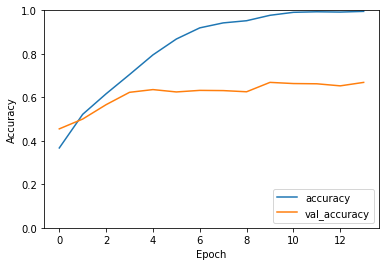

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)